In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

color = sns.color_palette()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

In [2]:
datafile = pd.read_csv('E://DataMining/visit-patterns-by-census-block-group/cbg_patterns.csv')
datafile.head(10)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,10059508001.000,1538352000,1541030400,75122.000,18314.000,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.000,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,10090506011.000,1538352000,1541030400,95649.000,38942.000,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.000,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,10479572002.000,1538352000,1541030400,14009.000,3039.000,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.000,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,10690404001.000,1538352000,1541030400,128169.000,25418.000,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.000,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,10730112101.000,1538352000,1541030400,51453.000,9499.000,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.000,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."
5,10970063022.000,1538352000,1541030400,152557.000,23556.000,"{""010970063011"":370,""010970063021"":351,""010970...","{""010970063011"":328,""010970064023"":125,""010970...",40327.000,"[""walmart""]","[""walmart"",""Shell Oil"",""Dollar General"",""mcdon...","[""walmart"",""Winn Dixie"",""Ollie's Bargain Outle...","[7153,6710,6479,6556,7460,8527,12533,12134,106...","{""Monday"":23968,""Tuesday"":23788,""Wednesday"":23..."
6,11030057022.000,1538352000,1541030400,66576.000,9252.000,"{""010890028021"":152,""011030057011"":152,""010950...","{""010890111001"":254,""010950305005"":108,""010890...",29100.000,"[""walmart"",""Chick-fil-A""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chick...","[""United States Postal Service (USPS)"",""SUBWAY...","[2261,2191,2140,2130,2202,2818,4315,5583,4157,...","{""Monday"":10269,""Tuesday"":10568,""Wednesday"":99..."
7,11150403002.000,1538352000,1541030400,23534.000,2140.000,"{""011150403001"":114,""011150403003"":110}",{},27052.000,"[""The American Legion"",""Dollar General"",""Jack'...","[""Jack's Family Restaurants"",""walmart"",""Dollar...","[""Dollar General"",""United States Postal Servic...","[2459,2397,2363,2385,2466,2442,2509,3292,2007,...","{""Monday"":3578,""Tuesday"":3520,""Wednesday"":3696..."
8,20200014005.000,1538352000,1541030400,20349.000,6101.000,"{""020200027114"":94,""020200028232"":83,""02020002...","{""020200016021"":103,""020200011001"":92,""0202000...",8092.000,"[""Papa Murphy's"",""starbucks"",""Holiday Station""]","[""starbucks"",""walmart"",""mcdonalds"",""Holiday St...","[""Papa Murphy's"",""Burger King US"",""Chevron"",""P...","[673,554,

In [8]:
datafile.drop(datafile.columns[0], axis=1, inplace=True)
datafile

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1538352000,1541030400,75122.000,18314.000,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.000,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1538352000,1541030400,95649.000,38942.000,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.000,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1538352000,1541030400,14009.000,3039.000,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.000,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1538352000,1541030400,128169.000,25418.000,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.000,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1538352000,1541030400,51453.000,9499.000,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.000,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."
5,1538352000,1541030400,152557.000,23556.000,"{""010970063011"":370,""010970063021"":351,""010970...","{""010970063011"":328,""010970064023"":125,""010970...",40327.000,"[""walmart""]","[""walmart"",""Shell Oil"",""Dollar General"",""mcdon...","[""walmart"",""Winn Dixie"",""Ollie's Bargain Outle...","[7153,6710,6479,6556,7460,8527,12533,12134,106...","{""Monday"":23968,""Tuesday"":23788,""Wednesday"":23..."
6,1538352000,1541030400,66576.000,9252.000,"{""010890028021"":152,""011030057011"":152,""010950...","{""010890111001"":254,""010950305005"":108,""010890...",29100.000,"[""walmart"",""Chick-fil-A""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chick...","[""United States Postal Service (USPS)"",""SUBWAY...","[2261,2191,2140,2130,2202,2818,4315,5583,4157,...","{""Monday"":10269,""Tuesday"":10568,""Wednesday"":99..."
7,1538352000,1541030400,23534.000,2140.000,"{""011150403001"":114,""011150403003"":110}",{},27052.000,"[""The American Legion"",""Dollar General"",""Jack'...","[""Jack's Family Restaurants"",""walmart"",""Dollar...","[""Dollar General"",""United States Postal Servic...","[2459,2397,2363,2385,2466,2442,2509,3292,2007,...","{""Monday"":3578,""Tuesday"":3520,""Wednesday"":3696..."
8,1538352000,1541030400,20349.000,6101.000,"{""020200027114"":94,""020200028232"":83,""02020002...","{""020200016021"":103,""020200011001"":92,""0202000...",8092.000,"[""Papa Murphy's"",""starbucks"",""Holiday Station""]","[""starbucks"",""walmart"",""mcdonalds"",""Holiday St...","[""Papa Murphy's"",""Burger King US"",""Chevron"",""P...","[673,554,484,439,450,476,583,1313,942,939,1154...","{""Monday"":3153,""Tuesday"":3351,""Wednesday"":3221..."
9,1538352000,1541030400,5102.000,1558.000,{},{},342203.000,"[""

# 数据摘要
### 对标称属性

In [9]:
# 对标称属性，给出不同变量的不同取值的频数
columns = ['raw_visit_count', 'raw_visitor_count', 'distance_from_home', 'related_same_month_brand', 'related_same_month_brand', 'top_brands', 'popularity_by_hour', 'popularity_by_day']
for column in columns:
    print(datafile[column].value_counts())
    print('-' * 66)

24531.000     15
12455.000     14
10888.000     14
21721.000     14
17801.000     13
16773.000     13
8524.000      13
15073.000     13
15161.000     13
11894.000     13
12980.000     13
17421.000     13
14482.000     13
12961.000     13
25796.000     13
16747.000     13
17567.000     13
15378.000     13
27618.000     13
21836.000     13
19911.000     13
15338.000     12
17419.000     12
11389.000     12
20390.000     12
12812.000     12
18861.000     12
25127.000     12
16338.000     12
14154.000     12
              ..
60669.000      1
108235.000     1
60670.000      1
94432.000      1
91460.000      1
81846.000      1
88565.000      1
153513.000     1
85144.000      1
471996.000     1
143524.000     1
153526.000     1
59418.000      1
67664.000      1
350032.000     1
80070.000      1
88559.000      1
58315.000      1
123050.000     1
78798.000      1
177120.000     1
935.000        1
76759.000      1
124678.000     1
3878.000       1
76758.000      1
192152.000     1
21082.000     

### 数值属性

In [10]:
# 数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数
datafile.describe()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
count,220734.000,220735.000,220735.000,220629.000,220629.000,220518.000
mean,287086382055.545,1538352000.000,1541030400.000,47930.660,11820.320,35112.803
std,164072266502.412,0.000,0.000,62526.548,30458.323,99731.927
min,10010201001.000,1538352000.000,1541030400.000,60.000,50.000,706.000
25%,131210116244.250,1538352000.000,1541030400.000,17042.000,3430.000,8584.000
50%,290190012013.500,1538352000.000,1541030400.000,30640.000,6541.000,14614.000
75%,420034897521.750,1538352000.000,1541030400.000,56678.000,13099.000,31397.750
max,780309900000.000,1538352000.000,1541030400.000,7179900.000,6113949.000,6297845.000


raw_visit_count 的最大值是7179900.000，最小值是60.000，均值是47930.660，中位数是30640.000，四分位数分别是17042.000、30640.000、56678.000
raw_visitor_count的最大值是6113949.000，最小值是50.000，均值是11820.320，中位数是6541.000，四分位数分别是3430.000、6541.000、13099.000
distance_from_home的最大值是6297845.000，最小值是706.000，均值是35112.803，中位数是14614.000，四分位数分别是8584.000、14614.000、31397.750

### 缺失值个数

In [11]:
# 计算缺失值的个数
datafile.isnull()[['raw_visit_count', 'raw_visitor_count', 'distance_from_home', 'related_same_month_brand', 'related_same_month_brand', 'top_brands', 'popularity_by_hour', 'popularity_by_day']].sum()

raw_visit_count             106
raw_visitor_count           106
distance_from_home          217
related_same_month_brand      0
related_same_month_brand      0
top_brands                    0
popularity_by_hour            0
popularity_by_day             0
dtype: int64

从数据计算结果来看，raw_visit_count缺失值个数为106，raw_visitor_count缺失值个数为106，distance_from_home缺失值个数为217，其他数据不缺失。

# 数据可视化
### 直方图绘制
由于raw_visit_count、raw_visitor_count、distance_from_home都是离散值，在此为每一个取值都加上一个服从正态分布的随机数。从而进行是否服从正态分布验证。

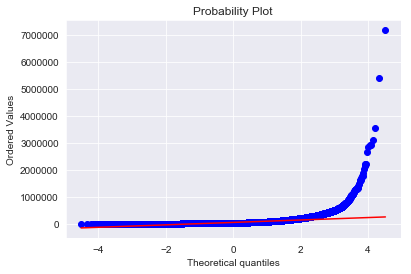

In [4]:
raw_visit_count = datafile['raw_visit_count'].dropna()
raw_visit_count = raw_visit_count.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(raw_visit_count, plot=plt)
plt.show()

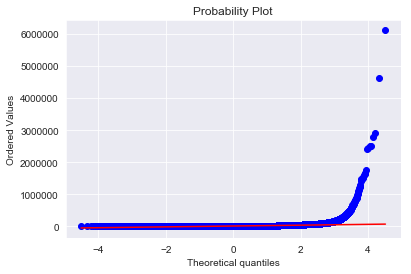

In [5]:
raw_visitor_count = datafile['raw_visitor_count'].dropna()
raw_visitor_count = raw_visitor_count.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(raw_visitor_count, plot=plt)
plt.show()

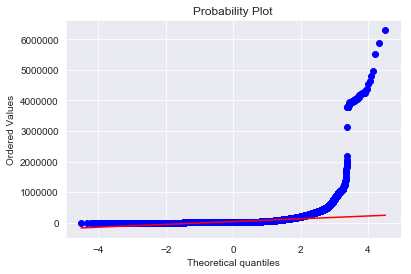

In [6]:
distance_from_home = datafile['distance_from_home'].dropna()
distance_from_home = distance_from_home.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(distance_from_home, plot=plt)
plt.show()

从QQ图中可以看出，raw_visit_count、raw_visitor_count、distance_from_home这三个数值都不是正态分布。

# 数据缺失的处理

In [9]:
all_data_na = (datafile.isnull().sum() / len(datafile)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
distance_from_home,0.098
raw_visitor_count,0.048
raw_visit_count,0.048
census_block_group,0.000


Text(0.5, 1.0, 'Percent missing data of feature')

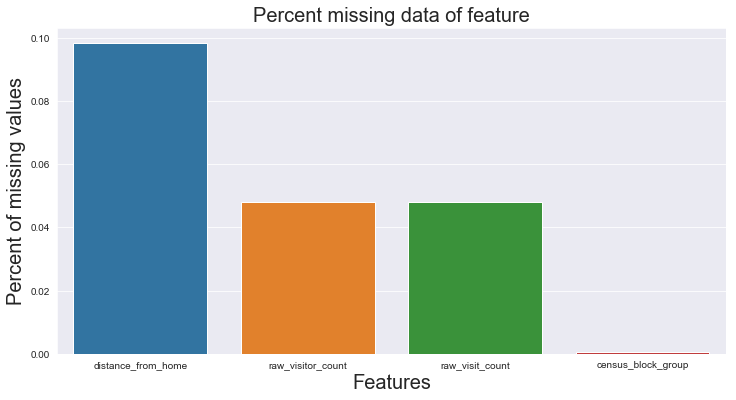

In [10]:
fig = plt.figure(figsize=(12, 6))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data of feature', fontsize=20)

从上表和柱状图可以看出distance_from_home、raw_visitor_count、raw_visit_count和census_block_group的缺失比例分别为0.098%、0.048%、0.048%和0。

In [7]:
datafile[datafile['raw_visit_count'].isnull()]

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220629,260539900000.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220630,691209900000.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220631,720579926000.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220632,20600001002.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220633,360039402001.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220634,660109516003.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220635,721099900000.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220636,450899708021.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220637,600209518002.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}
220638,350439403001.000,1538352000,1541030400,nan,nan,{},{},nan,[],[],[],[],{}


可以看出106条raw_visit_count数据缺失的同时，raw_visitor_count也缺失，因此将这些缺失数据删除。

In [11]:
datafile.drop(datafile[datafile['raw_visit_count'].isnull()].index, inplace=True)

In [12]:
datafile[datafile['distance_from_home'].isnull()]

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
1939,22900003002.000,1538352000,1541030400,221.000,120.000,{},{},nan,"[""Wendy's"",""Walgreens"",""starbucks"",""mcdonalds""...","[""Fred Meyer Jewelers""]",[],"[64,65,62,62,62,65,64,67,68,68,72,65,83,69,55,...","{""Monday"":46,""Tuesday"":50,""Wednesday"":30,""Thur..."
2838,22900004001.000,1538352000,1541030400,108.000,87.000,{},{},nan,"[""The American Legion"",""SUBWAY"",""AC Value Cent...","[""United States Postal Service (USPS)""]","[""United States Postal Service (USPS)""]","[31,28,28,28,27,28,25,28,26,27,23,27,23,30,27,...","{""Monday"":18,""Tuesday"":16,""Wednesday"":12,""Thur..."
3128,660109502004.000,1538352000,1541030400,545.000,121.000,{},{},nan,"[""BevMo"",""SUBWAY""]","[""SUBWAY""]",[],"[60,57,58,57,54,53,52,67,57,55,52,60,74,81,72,...","{""Monday"":78,""Tuesday"":77,""Wednesday"":105,""Thu..."
3986,410119901010.000,1538352000,1541030400,151.000,63.000,{},{},nan,"[""Dairy Queen"",""Taco Bell"",""Charter Communicat...","[""Safeway"",""Fred Meyer"",""walmart"",""Fred Meyer ...",[],"[5,6,5,7,8,7,18,18,23,30,29,29,20,23,16,12,10,...","{""Monday"":29,""Tuesday"":9,""Wednesday"":27,""Thurs..."
4372,721130726002.000,1538352000,1541030400,444.000,167.000,{},{},nan,"[""Publix Super Markets""]",[],[],"[104,94,102,103,99,93,92,78,73,70,80,61,60,68,...","{""Monday"":68,""Tuesday"":65,""Wednesday"":62,""Thur..."
5321,21880001001.000,1538352000,1541030400,991.000,480.000,{},{},nan,"[""Hyatt House"",""Fred Meyer Jewelers"",""Boys & G...",[],"[""Boys & Girls Clubs of America"",""United State...","[343,303,283,274,275,269,259,254,244,242,225,2...","{""Monday"":169,""Tuesday"":125,""Wednesday"":107,""T..."
6261,20500003002.000,1538352000,1541030400,170.000,120.000,{},{},nan,"[""Costco Wholesale Corp."",""Wells Fargo"",""Marri...",[],[],"[30,29,28,31,32,34,32,32,33,34,32,38,35,28,31,...","{""Monday"":26,""Tuesday"":32,""Wednesday"":22,""Thur..."
13690,691209501013.000,1538352000,1541030400,635.000,147.000,{},{},nan,[],[],[],"[60,60,58,61,55,61,59,91,104,124,131,127,121,1...","{""Monday"":117,""Tuesday"":111,""Wednesday"":98,""Th..."
14313,660109503001.000,1538352000,1541030400,181.000,131.000,{},{},nan,"[""SUBWAY""]",[],[],"[4,2,2,2,2,3,2,3,2,9,29,52,49,43,36,32,16,8,5,...","{""Monday"":29,""Tuesday"":47,""Wednesday"":16,""Thur..."
14913,660109561002.000,1538352000,1541030400,243.000,74.000,{},{},nan,[],[],[],"[14,14,13,13,11,13,18,37,51,54,57,58,42,44,52,...","{""Monday"":34,""Tuesday"":51,""Wednesday"":58,""Thur..."


从上表及上文分析看出，distance_from_home缺失比例较小，因此用最高频率值来填补缺失值。

In [14]:
datafile['distance_from_home'] = datafile['distance_from_home'].fillna(datafile['distance_from_home'].value_counts().index[0])

In [15]:
# 计算缺失值的个数
datafile.isnull()[['raw_visit_count', 'raw_visitor_count', 'distance_from_home', 'related_same_month_brand', 'related_same_month_brand', 'top_brands', 'popularity_by_hour', 'popularity_by_day']].sum()

raw_visit_count             0
raw_visitor_count           0
distance_from_home          0
related_same_month_brand    0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64

In [17]:
all_data_na = (datafile.isnull().sum() / len(datafile)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio


从上表和计算结果可以看出已经没有缺失值了。